## 课堂练习
--使用Pandas和matplotlib进行数据分析与可视化

### 项目背景
---
本福特定律是一种观察到的现象，指出在许多现实生活中的数据集中，首位数字为1的数出现的频率远高于其他数字。在这个项目中，我们将使用Pandas分析世界各国人口数据集，验证本福特定律是否成立，并使用matplotlib绘制结果直方图。

【能用数学预测未来吗？本福特定律】 https://www.bilibili.com/video/BV1C5411L78t/?share_source=copy_web

#### 具体要求
---
- 使用Pandas读取世界各国人口数据CSV文件。
- 计算每个人口数量的首位数字。
- 统计1~9开头的数字出现的频数。
- 使用matplotlib绘制直方图，展示首位数字1~9的频数分布。

#### 数据来源

数据来源：世界各国人口数据可以从世界银行（World Bank）或其他可靠来源获取。你需要准备一个包含国家名称和人口数量的CSV文件，例如：world_population.csv。

#### 读取数据集

In [167]:
import pandas as pd

# 读取CSV文件
data = pd.read_excel('world_population.xlsx')


#### 如何计算每个人口数量的首位数字？

In [168]:
def get_first_digit(number):
    while number >= 10:
        number //= 10
    return number

get_first_digit(3457)

3

#### 数据筛选

In [169]:
#["2015 [YR2015]","2016 [YR2016]","2017 [YR2017]","2018 [YR2018]","2019 [YR2019]","2020 [YR2020]","2021 [YR2021]"]
popData=data.iloc[:,4:26]
popData

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,19542982,19688632,21000256,22645130,23553551,24411191,25442944,25903301,26427199,27385307,...,30466479,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462
1,3089027,3060173,3051010,3039616,3026939,3011487,2992547,2970017,2947314,2927519,...,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666
2,30774621,31200985,31624696,32055883,32510186,32956690,33435080,33983827,34569592,35196037,...,37260563,38000626,38760168,39543154,40339329,41136546,41927007,42705368,43451666,44177969
3,58230,58324,58177,57941,57626,57254,56837,56383,55891,55366,...,53691,52995,52217,51368,50448,49463,48424,47321,46189,45035
4,66097,67820,70849,73907,76933,79826,80221,78168,76055,73852,...,71013,71367,71621,71746,72540,73837,75013,76343,77700,79034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,671212486,689161982,707693440,726785433,746546802,766978666,788110000,810019264,832642735,855885698,...,929328653,955096428,981506334,1008698525,1036155715,1063885000,1092403699,1121548775,1151301807,1181162739
262,671131355,689080780,707609717,726702652,746464327,766895808,788025400,809934231,832555779,855798400,...,929240350,955006479,981414975,1008605106,1036061038,1063789157,1092306937,1121451150,1151203345,1181063481
263,671212486,689161982,707693440,726785433,746546802,766978666,788110000,810019264,832642735,855885698,...,929328653,955096428,981506334,1008698525,1036155715,1063885000,1092403699,1121548775,1151301807,1181162739
264,2158201213,2176410449,2193797571,2210557257,2227039419,2243536298,2259259920,2274211146,2289934559,2306134012,...,2357942787,2378263733,2398563632,2417959696,2436043943,2453799496,2469801107,2483924063,2495285443,2503136362


#### 数据处理

In [171]:
numbers=[0,0,0,0,0,0,0,0,0];

for i in range(266):
    for j in range(7):
        currentNumber=popData.values[i][j]
        get_first_digit(currentNumber)

TypeError: '>=' not supported between instances of 'str' and 'int'

#### 筛选异常值

In [181]:
#我们定义一个函数，用于检查值是否为数字：
def is_number(value):
    return isinstance(value, (int, float))

import pandas
# 将包含字符串值的列中的所有元素转换为数值类型，如果遇到字符串则自动变为nan
popData=popData.applymap(lambda x: x if is_number(x) else 0)
popData

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,19542982,19688632,21000256,22645130,23553551,24411191,25442944,25903301,26427199,27385307,...,30466479,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462
1,3089027,3060173,3051010,3039616,3026939,3011487,2992547,2970017,2947314,2927519,...,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666
2,30774621,31200985,31624696,32055883,32510186,32956690,33435080,33983827,34569592,35196037,...,37260563,38000626,38760168,39543154,40339329,41136546,41927007,42705368,43451666,44177969
3,58230,58324,58177,57941,57626,57254,56837,56383,55891,55366,...,53691,52995,52217,51368,50448,49463,48424,47321,46189,45035
4,66097,67820,70849,73907,76933,79826,80221,78168,76055,73852,...,71013,71367,71621,71746,72540,73837,75013,76343,77700,79034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,671212486,689161982,707693440,726785433,746546802,766978666,788110000,810019264,832642735,855885698,...,929328653,955096428,981506334,1008698525,1036155715,1063885000,1092403699,1121548775,1151301807,1181162739
262,671131355,689080780,707609717,726702652,746464327,766895808,788025400,809934231,832555779,855798400,...,929240350,955006479,981414975,1008605106,1036061038,1063789157,1092306937,1121451150,1151203345,1181063481
263,671212486,689161982,707693440,726785433,746546802,766978666,788110000,810019264,832642735,855885698,...,929328653,955096428,981506334,1008698525,1036155715,1063885000,1092403699,1121548775,1151301807,1181162739
264,2158201213,2176410449,2193797571,2210557257,2227039419,2243536298,2259259920,2274211146,2289934559,2306134012,...,2357942787,2378263733,2398563632,2417959696,2436043943,2453799496,2469801107,2483924063,2495285443,2503136362


In [177]:
popData.values[252][0]

0

#### 正式进入数据处理

In [187]:
numbers=[0,0,0,0,0,0,0,0,0];

for i in range(266):
    for j in range(7):
        currentNumber=popData.values[i][j]
        index=get_first_digit(currentNumber)-1
        numbers[index]=numbers[index]+1

numbers

[507, 312, 233, 214, 165, 138, 117, 107, 69]

#### 数据可视化

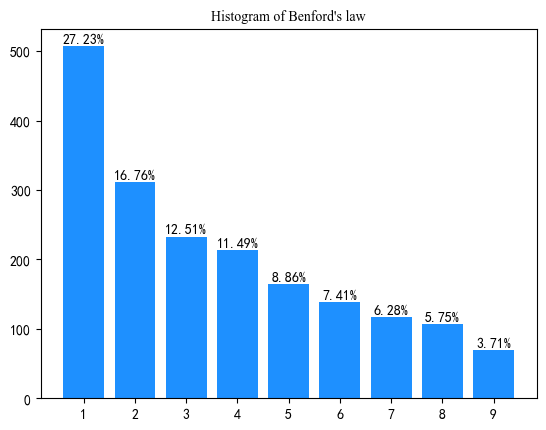

In [220]:
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
#绘图
x=[1,2,3,4,5,6,7,8,9]
bars=plt.bar(x,numbers,color="#1e90ff")

#修饰
plt.xticks([1,2,3,4,5,6,7,8,9])
plt.title("Histogram of Benford's law",font="Times New Roman")

#计算频率
frequency=[0,0,0,0,0,0,0,0,0]
for i in range(len(numbers)):
    frequency[i]=(numbers[i]/sum(numbers))*100



# 在柱状图顶部显示数据
i=0
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, str(round(frequency[i],2))+"%", ha='center', va='bottom')
    i=i+1;

    
plt.show()

#### 完整代码如下

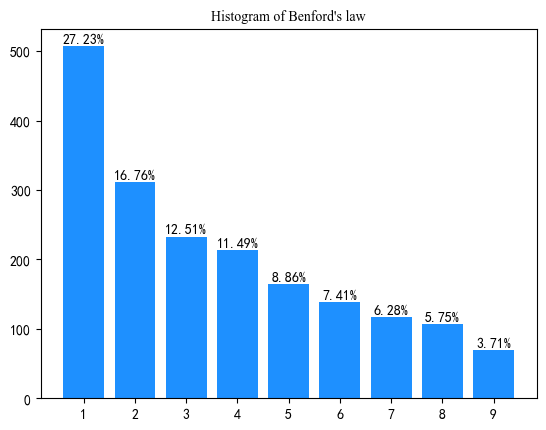

In [221]:
import pandas as pd

def get_first_digit(number):
    while number >= 10:
        number //= 10
    return number

#我们定义一个函数，用于检查值是否为数字：
def is_number(value):
    return isinstance(value, (int, float))

# 将包含字符串值的列中的所有元素转换为数值类型，如果遇到字符串则自动变为nan
popData=popData.applymap(lambda x: x if is_number(x) else 0)

#数据处理
numbers=[0,0,0,0,0,0,0,0,0];

for i in range(266):
    for j in range(7):
        currentNumber=popData.values[i][j]
        index=get_first_digit(currentNumber)-1
        numbers[index]=numbers[index]+1




# 读取CSV文件
data = pd.read_excel('world_population.xlsx')
############数据可视化#######################
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
#绘图
x=[1,2,3,4,5,6,7,8,9]
bars=plt.bar(x,numbers,color="#1e90ff")

#修饰
plt.xticks([1,2,3,4,5,6,7,8,9])
plt.title("Histogram of Benford's law",font="Times New Roman")

#计算频率
frequency=[0,0,0,0,0,0,0,0,0]
for i in range(len(numbers)):
    frequency[i]=(numbers[i]/sum(numbers))*100



# 在柱状图顶部显示数据
i=0
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, str(round(frequency[i],2))+"%", ha='center', va='bottom')
    i=i+1;

    
plt.show()